In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Funcion que carga los datos
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

# 1. Regresión Logística

Los datos del fichero ex2data1.csv representan las notas obtenidas por una seria de candidatos en los dos exámenes de admisión de una universidad junto con la información sobre si fueron (1) o no (0) admitidos.
El objetivo es construir un modelo por regresión logística que estime la probabilidad de que un estudiante sea admitido en esa universidad en base a las notas de sus exámenes.

## 1.1 Visualización de los datos

In [3]:
data = load_csv('ex2data1.csv')

#Obtencion de todas las columnas de la tabla menos la ultima columna
X = data[:, :-1]
np.shape(X)
#Obtencion de la ultima columna de la tabla
Y = data[:, -1]
np.shape(Y)


(100,)

In [4]:
def mostrar_data(Y, X):   
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(Y == 1)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos2 = np.where(Y == 0)

    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos2, 0], X[pos2, 1], marker='.', c='r')

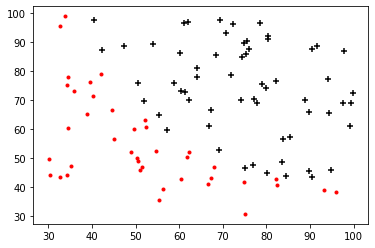

In [5]:
mostrar_data(Y, X)

## 1.2 Funcion Sigmoide

In [6]:
def sigmoid_funct(z):
    return 1 / (1 + np.exp(-z))

## 1.3. Cálculo de la función de costes y su gradiente

In [7]:
def cost_funct(Theta, X, Y):
    #g(X*Theta)
    g = sigmoid_funct(np.matmul(X, Theta))
    #g = sigmoid_funct(X * Theta)
    m = np.shape(X)[0]
    
    J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
    return np.sum(-J)/m

In [8]:
def gradient(Theta, X, Y):
    m = np.shape(X)[0]
    g = sigmoid_funct(np.matmul(X,Theta))
    J = np.dot(np.transpose(X), (g - Y))
    return J/m

In [9]:
#Obtenido del código ejemplo del profesor
def pinta_frontera_recta(X, Y, Theta):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    h = sigmoid_funct(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(Theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    
    plt.show
    aux(fig, ax)
    #plt.savefig("fronteir.png")
    #plt.close()

In [10]:
def porcentaje_aciertos(Theta, X, Y):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    sigmoid = sigmoid_funct(np.matmul(X, Theta))

    # Se compara la estimacion nuestra con el resultado real (Y).
    # Se devuelve el numeros de ejemplos que se han estimado
    # correctamente, es decir, para aquellos que tengan
    # el resultado del sigmoide mayor o igual a 0.5
    evaluation_correct = np.sum((sigmoid >= 0.5) == Y)
    
    # Devolvemos el porcentaje
    return evaluation_correct/len(sigmoid) * 100

#### Gráfica que pinta los puntos de los admitidos y los no adminidos

In [11]:
def aux(fig, ax):
    
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    np.shape(X)
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]
    np.shape(Y)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(Y == 1)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos2 = np.where(Y == 0)

    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = "Admitted")
    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos2, 0], X[pos2, 1], marker='.', c='r', label = "Not Admitted")
    
    # Anadimos leyenda a la grafica y la posicionamos bien
    plt.legend(loc = 'upper right')

    # Anadimos el texto a los ejes (como en la grafica que aparece de ejemplo)
    ax.set_xlabel('Exam1 Score', fontsize=10)
    ax.set_ylabel('Exam2 Score', fontsize=10)

In [12]:
def logistic_regresion():
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    m = np.shape(X)[0]
    # Aregamos una columna de 1s
    X = np.hstack([np.ones([m, 1]), X])
    n = np.shape(X)[1]
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]
    
    Theta = np.zeros(n)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient, args=(X,Y), messages=0)
    theta_opt = result[0]
    
    print("theta optimizada:", theta_opt)
    print("Coste final:" , cost_funct(theta_opt, X,Y))
    pinta_frontera_recta(X, Y, theta_opt)
    #aux()
    porcentaje =  porcentaje_aciertos(theta_opt, X, Y)
    print(porcentaje)
    

theta optimizada: [-25.16131853   0.20623159   0.20147149]
Coste final: 0.20349770158947497
89.0


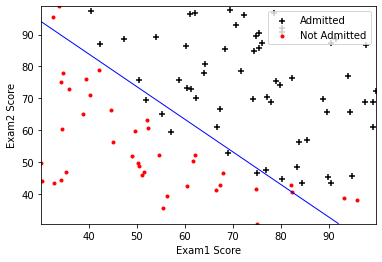

In [13]:
logistic_regresion()

## Parte 2: Regresion logística con normalización

#### Mostramos los datos

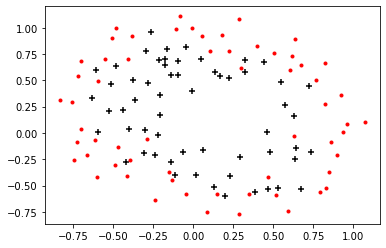

In [14]:
data = load_csv('ex2data2.csv')

#Obtencion de todas las columnas de la tabla menos la ultima columna
X = data[:, :-1]

#Obtencion de la ultima columna de la tabla
Y = data[:, -1]
mostrar_data(Y, X)

### Función de coste

In [15]:
def func_coste_reg(Thetas, X, Y, lmb, m):
    return cost_funct(Thetas, X, Y) + regularizacion(Thetas[1:], lmb, m)

### Término de regularización para la función de coste

In [16]:
def regularizacion(Thetas, lmb, m):
    return (lmb/(2*m))*np.sum(Thetas**2)

### Función gradiente

In [17]:
def func_grad_reg(Thetas, X, Y, lmb, m):
    return np.add(gradient(Thetas, X, Y) , reg_grad(Thetas[1:], lmb, m))

### Lista de términos de regularización para la función gradiente

In [18]:
def reg_grad(Thetas, lmb, m):
        return np.insert(lmb/m*Thetas, 0, values=[0])

#### Gráfica que pinta los puntos y la decision boundary

In [19]:
def plot_decisionboundary(X, Y, theta, poly, i):
    fig= plt.figure()
    
    X = data[:, :-1]
    np.shape(X)
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]
    np.shape(Y)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(Y == 1)
    # Obtiene un vector con los indices de los ejemplos positivos
    pos2 = np.where(Y == 0)

    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = "Admitted")
    # Dibujo de los ejemplos positivos
    plt.scatter(X[pos2, 0], X[pos2, 1], marker='.', c='r', label = "Not Admitted")
    
    # Anadimos leyenda a la grafica y la posicionamos bien
    plt.legend(loc = 'upper right')
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    
    h = sigmoid_funct(poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(theta))
    
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    
    plt.xlabel("Microchip test 1")
    plt.ylabel("Microchip test 1")

    plt.title("Lambda "+ str(i))
    
    #plt.savefig("boundary"+str(i)+".png")
    plt.show()
    plt.close()

118
Lambda:  0.1
[ 2.75388698  1.80721335  2.95658118 -4.21443404 -3.37939029 -4.22544931
  0.74561036 -1.07832526 -0.47232919 -0.49891973 -3.26576701  0.52786581
 -1.76302548 -1.20787927 -2.77792257 -0.6218179  -0.47037637  0.62372931
 -1.13695481 -1.21222022 -0.09177737 -2.6312903   0.44538637 -0.73615534
  0.42675229 -1.14905243 -0.95805126 -1.1488932 ]
Porcentaje aciertos: 83.89830508474576


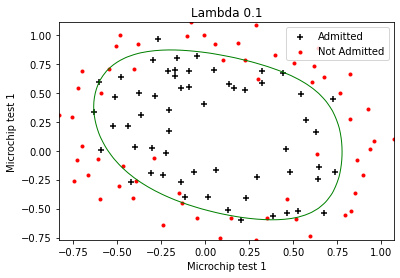

Lambda:  0.25
[ 2.15692437  1.34963208  2.21072385 -3.40684609 -2.22581796 -2.95875614
  0.44811725 -0.80545843 -0.59692879 -0.25558555 -2.53300297  0.10397847
 -1.23345172 -0.74989425 -2.10537582 -0.40141389 -0.38715372  0.14279334
 -0.66696222 -0.73726386 -0.40599407 -1.89000356  0.19247177 -0.55287418
  0.14475143 -0.70649416 -0.49396992 -1.25379926]
Porcentaje aciertos: 83.05084745762711


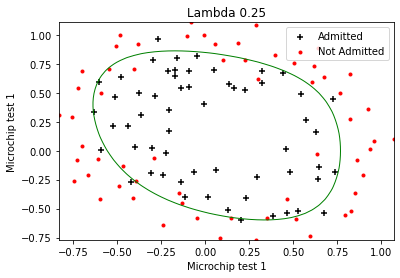

Lambda:  0.5
[ 1.69996419e+00  9.73384771e-01  1.67266989e+00 -2.71223372e+00
 -1.49381524e+00 -2.11919198e+00  2.69961788e-01 -5.67583463e-01
 -5.01630926e-01 -1.94865433e-01 -1.97405979e+00 -2.04387908e-02
 -8.94053927e-01 -4.75534944e-01 -1.63004457e+00 -3.01565418e-01
 -2.95927978e-01  1.64937605e-03 -4.35519282e-01 -4.80912980e-01
 -4.74916491e-01 -1.42837950e+00  8.26705729e-02 -4.13855113e-01
  5.35053427e-02 -4.86392721e-01 -2.77078665e-01 -1.13402783e+00]
Porcentaje aciertos: 82.20338983050848


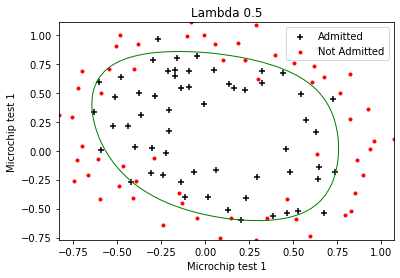

Lambda:  0.75
[ 1.44450762  0.76395587  1.3779903  -2.30233493 -1.13601759 -1.6969541
  0.18052684 -0.4430735  -0.4181204  -0.18111079 -1.66509637 -0.04580979
 -0.72349666 -0.3490297  -1.36771747 -0.26314436 -0.24197385 -0.03299091
 -0.33583679 -0.3643949  -0.47202575 -1.1943543   0.04529444 -0.34020781
  0.02695749 -0.38729405 -0.19066069 -1.0176174 ]
Porcentaje aciertos: 83.05084745762711


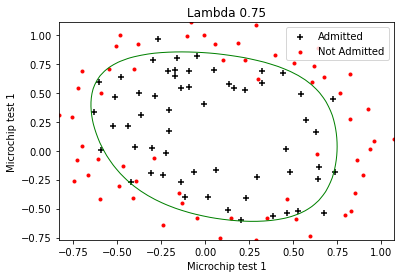

Lambda:  1
[ 1.27271029  0.62529965  1.18111687 -2.01987402 -0.9174319  -1.43166932
  0.12393226 -0.36553118 -0.35725405 -0.17516293 -1.4581701  -0.05098418
 -0.61558557 -0.27469165 -1.19271297 -0.2421784  -0.20603302 -0.04466177
 -0.27778948 -0.29539514 -0.45645982 -1.04319155  0.02779373 -0.29244867
  0.01555759 -0.32742405 -0.1438915  -0.92467487]
Porcentaje aciertos: 83.05084745762711


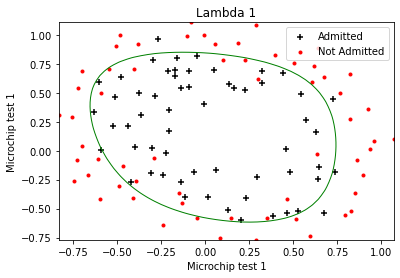

Lambda:  1.5
[ 1.04790747  0.44791448  0.92462821 -1.64371181 -0.66065364 -1.10796186
  0.05537145 -0.27307294 -0.27690149 -0.1680627  -1.18750458 -0.04769749
 -0.48187957 -0.19068348 -0.96666898 -0.21832395 -0.16019734 -0.04986018
 -0.21071912 -0.21582408 -0.420426   -0.850312    0.01236408 -0.2318942
  0.00645438 -0.25533285 -0.09472224 -0.78850452]
Porcentaje aciertos: 83.05084745762711


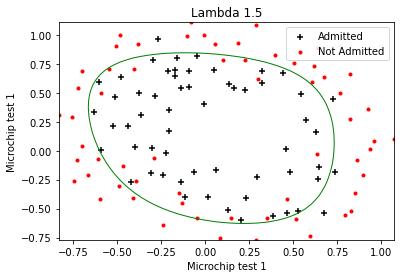

Lambda:  2
[ 0.90267454  0.33721089  0.76006405 -1.39757946 -0.51417075 -0.91389985
  0.01516213 -0.21926017 -0.22677642 -0.16219637 -1.01270257 -0.04169398
 -0.39984069 -0.14458017 -0.82296284 -0.20346048 -0.13186937 -0.04837714
 -0.17183934 -0.17077936 -0.38820996 -0.72773035  0.00607686 -0.19391899
  0.00314606 -0.21203169 -0.06947222 -0.69320886]
Porcentaje aciertos: 83.05084745762711


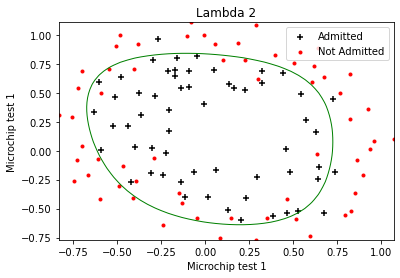

Lambda:  3
[ 7.19744121e-01  2.05451275e-01  5.56474357e-01 -1.08680284e+00
 -3.54063904e-01 -6.87883952e-01 -2.83602199e-02 -1.58627814e-01
 -1.67865592e-01 -1.52130438e-01 -7.92983870e-01 -3.19274336e-02
 -3.01679882e-01 -9.59124592e-02 -6.45678818e-01 -1.83239705e-01
 -9.81528819e-02 -4.27662719e-02 -1.27405215e-01 -1.21013407e-01
 -3.37395475e-01 -5.74645373e-01  1.03868494e-03 -1.47648085e-01
  1.00295464e-03 -1.60598172e-01 -4.43119616e-02 -5.66050799e-01]
Porcentaje aciertos: 80.50847457627118


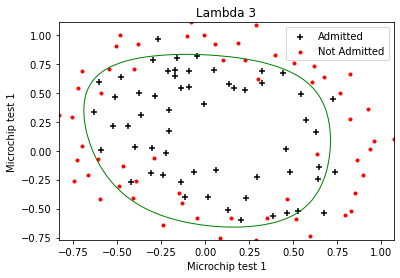

Lambda:  4
[ 6.06024340e-01  1.30364204e-01  4.33940703e-01 -8.95143356e-01
 -2.69146187e-01 -5.58390053e-01 -4.96300192e-02 -1.25084500e-01
 -1.34327116e-01 -1.43060334e-01 -6.57469503e-01 -2.56821263e-02
 -2.43871338e-01 -7.11127656e-02 -5.38262028e-01 -1.68358351e-01
 -7.85731882e-02 -3.76922289e-02 -1.02235403e-01 -9.41612681e-02
 -2.99716717e-01 -4.80261675e-01 -7.19282381e-04 -1.19983442e-01
  2.84874053e-04 -1.30427026e-01 -3.20269747e-02 -4.83374150e-01]
Porcentaje aciertos: 80.50847457627118


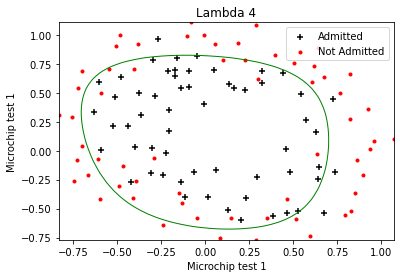

Lambda:  5
[ 5.26729152e-01  8.29970871e-02  3.51684225e-01 -7.63587648e-01
 -2.17066118e-01 -4.73369069e-01 -6.09920557e-02 -1.03748782e-01
 -1.12775154e-01 -1.35133261e-01 -5.64100762e-01 -2.15911144e-02
 -2.05414213e-01 -5.63669292e-02 -4.64782382e-01 -1.56260878e-01
 -6.57677512e-02 -3.36907040e-02 -8.57981214e-02 -7.72512535e-02
 -2.70659135e-01 -4.14881433e-01 -1.64679507e-03 -1.01401095e-01
  3.52412804e-06 -1.10283250e-01 -2.49768400e-02 -4.24346912e-01]
Porcentaje aciertos: 81.35593220338984


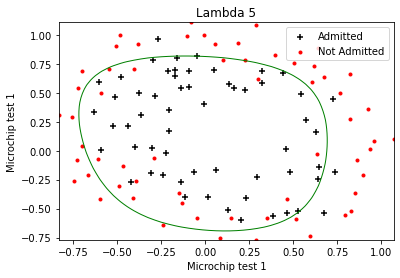

Lambda:  6
[ 4.67440166e-01  5.11204233e-02  2.92890709e-01 -6.67093428e-01
 -1.81988676e-01 -4.12827488e-01 -6.70853695e-02 -8.90608078e-02
 -9.76285726e-02 -1.28076112e-01 -4.95299178e-01 -1.87720948e-02
 -1.77812518e-01 -4.67303710e-02 -4.10805398e-01 -1.45983666e-01
 -5.66946255e-02 -3.04851995e-02 -7.41779874e-02 -6.56749814e-02
 -2.47417751e-01 -3.66442702e-01 -2.15789492e-03 -8.79446008e-02
 -2.10059531e-04 -9.57952059e-02 -2.04612919e-02 -3.79591329e-01]
Porcentaje aciertos: 78.8135593220339


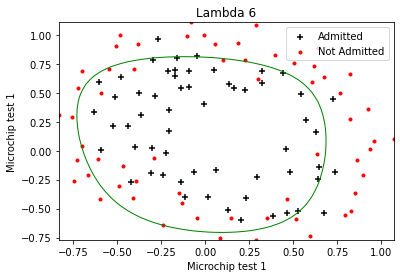

Lambda:  7
[ 4.21039535e-01  2.87971263e-02  2.48908351e-01 -5.92883549e-01
 -1.56899459e-01 -3.67199421e-01 -7.02121778e-02 -7.81965500e-02
 -8.64308771e-02 -1.21954081e-01 -4.42357706e-01 -1.67394210e-02
 -1.56974566e-01 -3.99239332e-02 -3.69226580e-01 -1.37089546e-01
 -4.99287809e-02 -2.78973529e-02 -6.54860306e-02 -5.72212634e-02
 -2.28347006e-01 -3.28955982e-01 -2.49103491e-03 -7.77738253e-02
 -2.94313879e-04 -8.48382887e-02 -1.73536651e-02 -3.44256902e-01]
Porcentaje aciertos: 78.8135593220339


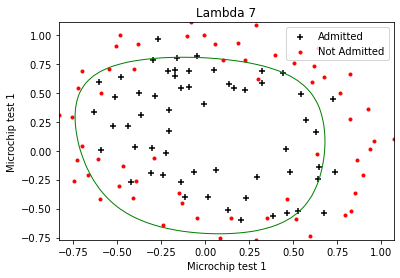

Lambda:  10
[ 0.32613879 -0.0081937   0.16579705 -0.44664536 -0.11177353 -0.27890096
 -0.07142123 -0.05788414 -0.06509848 -0.10636843 -0.33671549 -0.01295009
 -0.11670601 -0.02808898 -0.2860233  -0.11615744 -0.03705555 -0.02241237
 -0.04887208 -0.04163238 -0.18676627 -0.25334294 -0.00291817 -0.05796982
 -0.00053332 -0.06353213 -0.01207365 -0.27150097]
Porcentaje aciertos: 74.57627118644068


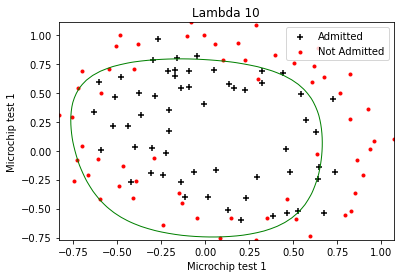

In [20]:
data = load_csv('ex2data2.csv')

#Obtencion de todas las columnas de la tabla menos la ultima columna
X = data[:, :-1]

m = np.shape(X)[1]

#Obtencion de la ultima columna de la tabla
Y = data[:, -1]

poly = PolynomialFeatures(6)
datapoly = poly.fit_transform(X)

m = np.shape(datapoly)[0]
n = np.shape(datapoly)[1]
print(m)

#Inicializamos las Thetas a 0
Thetas = np.zeros(n)

lmb = [0.1,0.25, 0.5,0.75,1,1.5, 2,3,4,5,6,7,10]
#lmb = [0.01,0.025, 0.05, 0.075]


#Para cada lambda calculamos las Thetas óptimas, pintamos la función y sacamos el porcentaje de aciertos
for i in lmb:
    result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(datapoly,Y,i,m), messages=0)
    print("Lambda: " , i)
    print(result[0])
    porcentaje =  porcentaje_aciertos(result[0], datapoly, Y)
    print("Porcentaje aciertos: " + str(porcentaje))
    plot_decisionboundary(X,Y, result[0], poly, i)